In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine

import tensorflow as tf
import tensorflow_hub as hub
from absl import logging

In [3]:
tf.__version__

'2.4.0'

# Datasets

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [63]:
dictionary = pd.read_csv("gdrive/MyDrive/2020/interviews/dictionary.csv").drop(columns=['Unnamed: 0'])
text_by_paragraph = pd.read_csv("gdrive/MyDrive/2020/interviews/text_by_paragraph.csv").drop(columns=['Unnamed: 0'])

In [ ]:
dictionary.head()

In [65]:
third = len(text_by_paragraph['Preprocessed_text'])//3

# Universal Sentences Encoder

In [66]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [67]:
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(text_by_paragraph['Corpus'].tolist())
dic_embeddings = embed(dictionary['word'].tolist())

# Calculating the cosine similarity

(array([[  2.,  32., 180., ...,  84.,  22.,   1.],
        [  0.,  37., 170., ...,  87.,  29.,   3.],
        [  3.,  26., 176., ...,  97.,  43.,   5.],
        ...,
        [  2.,  72., 553., ...,   0.,   0.,   0.],
        [  2.,  54., 498., ...,   0.,   0.,   0.],
        [  2.,  54., 498., ...,   0.,   0.,   0.]]),
 array([-0.21974865, -0.12909693, -0.03844521,  0.05220651,  0.14285822,
         0.23350994,  0.32416165,  0.41481337,  0.5054651 ,  0.59611684,
         0.68676853], dtype=float32),
 <a list of 279 Lists of Patches objects>)

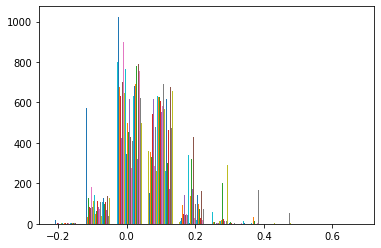

In [68]:
import matplotlib.pyplot as plt    
cosine_matrix = cosine_similarity(message_embeddings, dic_embeddings)
plt.hist(cosine_matrix)

In [69]:
#comments, topics = np.where(cosine_matrix>=0.15)
comments = [idx for idx, val in list(enumerate(np.argmax(cosine_matrix, axis=1)))]
topics = [val for idx, val in list(enumerate(np.argmax(cosine_matrix, axis=1)))]

In [73]:
paragraphs = text_by_paragraph.loc[comments, ['Document_name', 'Order']].reset_index().drop(columns=['index'])
topics_df = dictionary.iloc[topics].reset_index().drop(columns=['index'])

topics_references = pd.concat([paragraphs,topics_df], axis=1)

In [75]:
#unique_topics = topics_references[['Document_name','Order']].drop_duplicates()
#unique_do = text_by_paragraph[['Document_name','Order']].drop_duplicates()

#print(unique_topics.shape)
#print(unique_do.shape)

In [74]:
topics_references.to_csv("gdrive/MyDrive/2020/interviews/topics.csv")